In [2]:
import numpy as np
import math
import matplotlib.mlab as mlab
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from itertools import cycle
from sklearn.decomposition import PCA

In [44]:
all_data = [[1,0,0],[1,1,0],[0,1,0],[0,0,1]]
all_label = [0,1,2,3]

sd = .4
n = 125
random_seed = 42


# (100,010,001,110)


In [46]:
print(data.shape)

data_2d = np.vstack((data[0], data[1], data[2], data[3]))

label = []
data_length = len(all_data)

label = [i for i in range(data_length) for j in range(n)]
label = np.array(label)

print(data_2d.shape)

(4, 125, 3)
(500, 3)


In [45]:
def make_data3(data_list,sd,n):
    
    X = np.zeros([3,n])
    i = 0
    data_pro = [] 
    for d in data_list :
        X[i,0:n] = np.random.normal(d,sd,int(n))
        i += 1 
        
    return X 

def plot3d(all_data,sd,n) :
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111, projection='3d')
    cycol = cycle('bgrcmk')
    i = 0 
    size_all = len(all_data) ; size_data =len(all_data[0])
    data = np.zeros([size_all,n,size_data])
    for data_list in all_data :
        X = make_data3(data_list,sd,n)
        ax.scatter(X[0],X[1],X[2], c = next(cycol) , marker = 'o')
        data[i] = X.T
        i += 1
    ax.set_title('Psk (100,010,001,110) With Noise')
    ax.set_xlabel('100')
    ax.set_ylabel('010')
    ax.set_zlabel('001')
    plt.show()
    
    return data

def plotPCA(data,all_data,label) :
    fig = plt.figure(figsize = (8,8))
    cycol = ['b','g','r','c','m','k']
    
    pca = PCA(2)
    data_pca = pca.fit_transform(data)
    
    for i,c in zip(all_label,cycol):        
        plt.scatter(data_pca[label==i,0], data_pca[label==i,1], color = c, label = str(all_data[i]))
    plt.title('Principal Component Analysis')
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.legend()
    plt.show()
    
    return

def plotTSNE(data,all_data,random_seed,label) :
    
    tsne = TSNE(n_components = 2,random_state = random_seed)
    cycol = cycle('bgrcmk')
    plt.figure(figsize = (8,8))
    
    data_tsne = tsne.fit_transform(data)
    
    for i,c in zip(all_label,cycol):        
        plt.scatter(data_tsne[label==i,0], data_tsne[label==i,1], color = c, label = str(all_data[i]))
        
    plt.legend()
    plt.show()
    
    return


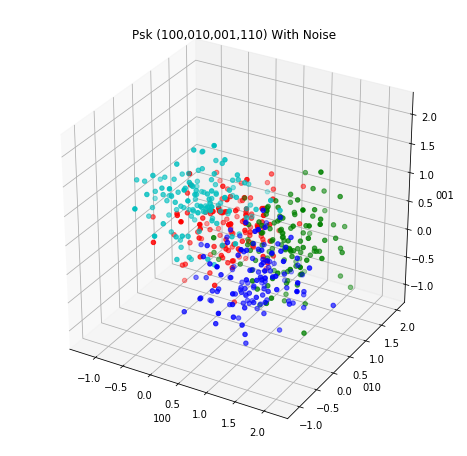

In [38]:
data = plot3d(all_data,sd,n)

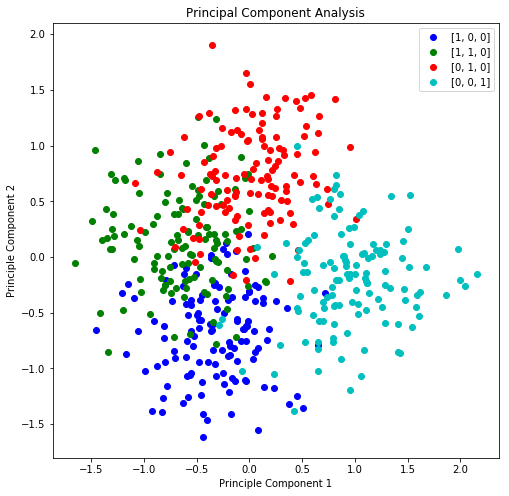

In [36]:
plotPCA(data_2d,all_data,label)

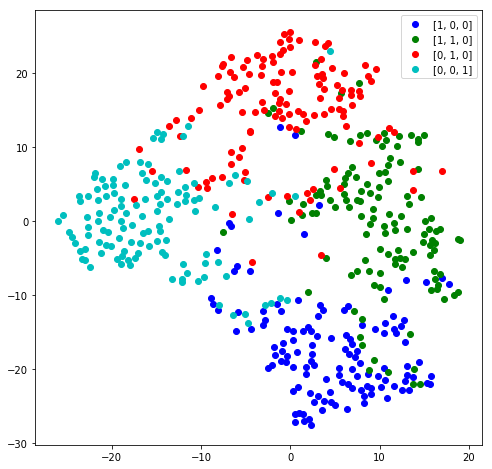

In [47]:
plotTSNE(data_2d,all_data,random_seed,label)

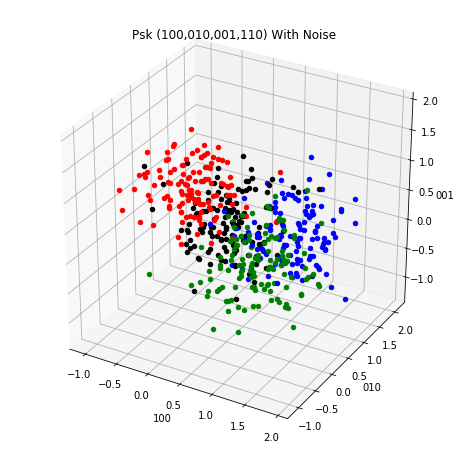

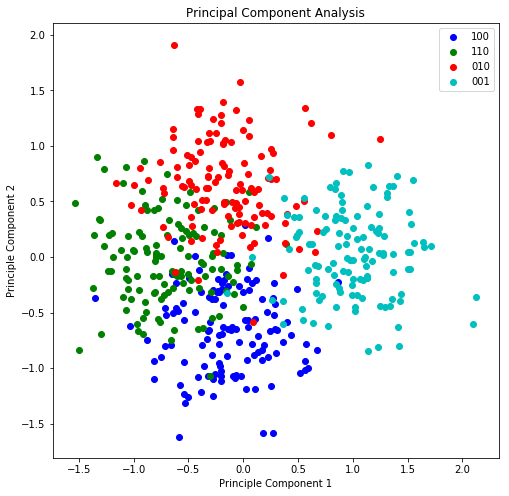

Processing T-SNE Tranformation ------ Please wait...


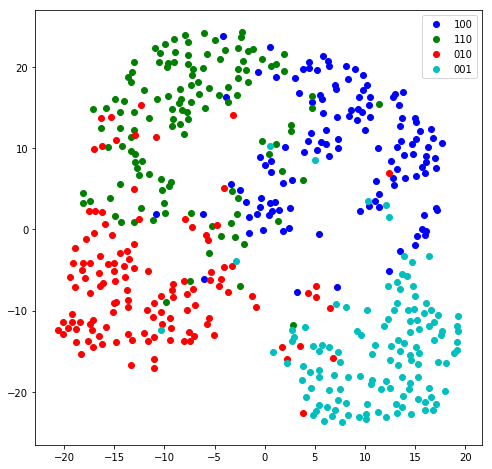

Done


In [39]:
import numpy as np;
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def make_psk(sd,n):
    X = np.zeros([3,n])
    
    #data 100
    x1 = np.random.normal(1,sd,int(n/4))
    x2 = np.random.normal(0,sd,int(n/4))
    x3 = np.random.normal(0,sd,int(n/4))
    X[0,0:int(n/4)] = x1
    X[1,0:int(n/4)] = x2
    X[2,0:int(n/4)] = x3
    
    #data 110
    x1 = np.random.normal(1,sd,int(n/4))
    x2 = np.random.normal(1,sd,int(n/4))
    x3 = np.random.normal(0,sd,int(n/4))
    X[0,int(n/4):int(n/2)] = x1
    X[1,int(n/4):int(n/2)] = x2
    X[2,int(n/4):int(n/2)] = x3
    
    #data 010
    x1 = np.random.normal(0,sd,int(n/4))
    x2 = np.random.normal(1,sd,int(n/4))
    x3 = np.random.normal(0,sd,int(n/4))
    X[0,int(n/2):int(3*n/4)] = x1
    X[1,int(n/2):int(3*n/4)] = x2
    X[2,int(n/2):int(3*n/4)] = x3 
    
    #data 001
    x1 = np.random.normal(0,sd,int(n/4))
    x2 = np.random.normal(0,sd,int(n/4))
    x3 = np.random.normal(1,sd,int(n/4))
    X[0,int(3*n/4):int(n)] = x1
    X[1,int(3*n/4):int(n)] = x2
    X[2,int(3*n/4):int(n)] = x3
    
    X = X.T
    y = np.zeros(n)
    y[0:int(n/4)] = 1
    y[int(n/4):int(n/2)] = 2 
    y[int(n/2):int(3*n/4)] = 3
    y[int(3*n/4):int(n)] = 4
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(n):
        x = X[i]
        if y[i] == 1:
            ax.scatter(x[0],x[1],x[2],c = 'g' , marker = 'o')
        elif y[i] == 2:
            ax.scatter(x[0],x[1],x[2],c = 'b' , marker = 'o')
        elif y[i] == 3:
            ax.scatter(x[0],x[1],x[2],c = 'k' , marker = 'o')
        elif y[i] == 4:
            ax.scatter(x[0],x[1],x[2],c = 'r' , marker = 'o')
    
    ax.set_title('Psk (100,010,001,110) With Noise')
    ax.set_xlabel('100')
    ax.set_ylabel('010')
    ax.set_zlabel('001')
    plt.show()  
    
    return X,y

#Generate PSK with Gaussian Noise SD = 0.4 , Number of Example = 500
X,y = make_psk(0.4,500)

#Principal Components Analysis
pca = PCA(2)
X_pca = pca.fit_transform(X)
typ = [1,2,3,4]
color = ['b','g','r','c','m','k']
psk_typ = ['100','110','010','001']
plt.figure(figsize = (8,8))
for i,c,label in zip(typ,color,psk_typ):
    plt.scatter(X_pca[y == i,0],X_pca[y == i,1], c = c,label = label)
plt.title('Principal Component Analysis')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend()
plt.show()

print('Processing T-SNE Tranformation ------ Please wait...')
#T=SNE 
tsne = TSNE(n_components = 2,random_state = 42)
X_tsne = tsne.fit_transform(X)
plt.figure(figsize = (8,8))
for i,c,label in zip(typ,color,psk_typ):
    plt.scatter(X_tsne[y == i,0],X_tsne[y == i,1],c = c,label = label)
plt.legend()
plt.show()

print('Done')